In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import corner

In [86]:
sims = [300, 400, 500, 600, 700, 800, 1100, 1200, 1500, 1700, 1800, 1900, 2100, 2200, 2300, 2400, 2600, 2700, 2800, \
        3100, 3300, 3400, 3500, 3700, 3900, 4100, 4900, 5000, 5300, 5400, 5600, 5700, 5900, 6000]
# sims = np.arange(200, 6200, 100)

mchirp_true = 1.4847507357166811
mchirp = []
dL = []
iota = []
idx_LVA = []

for i in sims:
    
    file = h5py.File('post_samples_interp_L1V1A0_{}.hdf'.format(i), 'r')
    temp = np.array(file['Mc'])
    
    if(mchirp_true >= np.quantile(temp, q=[0.05]) and mchirp_true <= np.quantile(temp, q=[0.95])):
        
        mchirp.append(list(np.array(file['Mc'])))
        dL.append(list(np.array(file['dL'])))
        iota.append(list(np.array(file['iota'])))
        idx_LVA.append(i)
        
    file.close()


In [21]:
len(idx_LVA)

28

In [25]:
idx_LVA

[300,
 400,
 500,
 600,
 700,
 800,
 1100,
 1200,
 1800,
 1900,
 2100,
 2200,
 2300,
 2400,
 2700,
 2800,
 3100,
 3300,
 3500,
 3700,
 3900,
 4100,
 4900,
 5000,
 5300,
 5600,
 5700,
 5900]

In [44]:
# idx_LV = [300, 400, 500, 600, 700, 800, 1100, 1200, 1500, 1700, 1800, 1900, 2100, 2200, 2300, 2400, 2600, 2700, 2800, 3100]

# com_idx = []

# i = 0

# while(i<20):
    
#     if(idx_LV[i] in idx_LVA):
        
#         com_idx.append(idx_LV[i]) 
        
#     i += 1

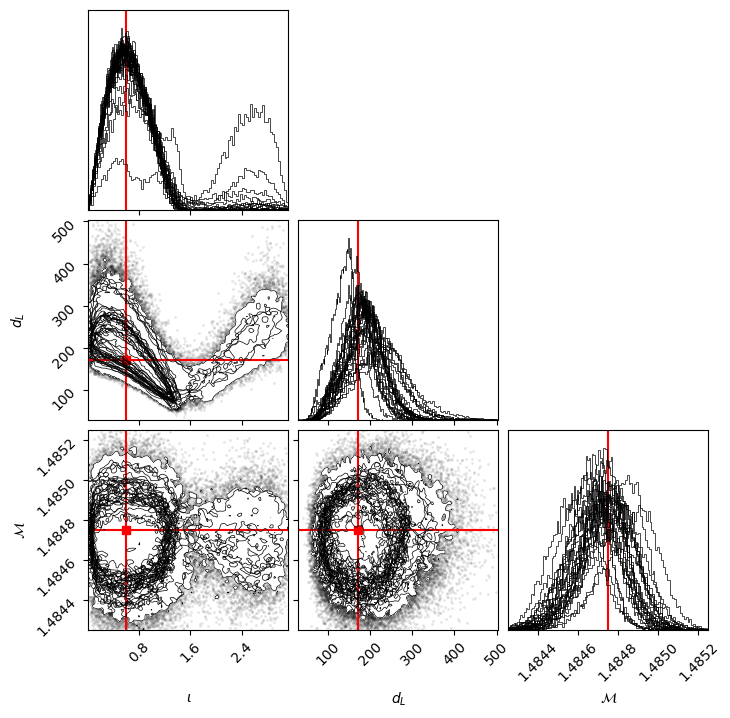

In [87]:
bins = 100

labels = [r'$\iota$', r'$d_L$', r'$\mathcal{M}$']

fig = corner.corner(np.column_stack((iota[0], dL[0], mchirp[0])), bins=bins, labels=labels, labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), plot_density=False, contour_kwargs=dict(linewidths=0.5), smooth=0.9, truths=[0.583, 170.99, mchirp_true], truth_color='r')

for i in range(1, len(idx_LVA)-1):
    
    corner.corner(np.column_stack((iota[i], dL[i], mchirp[i])), bins=bins, labelpad=0.005, levels=[0.9], hist_kwargs=dict(lw=0.5, density=True), plot_density=False, contour_kwargs=dict(linewidths=0.5), smooth=0.9, fig=fig)

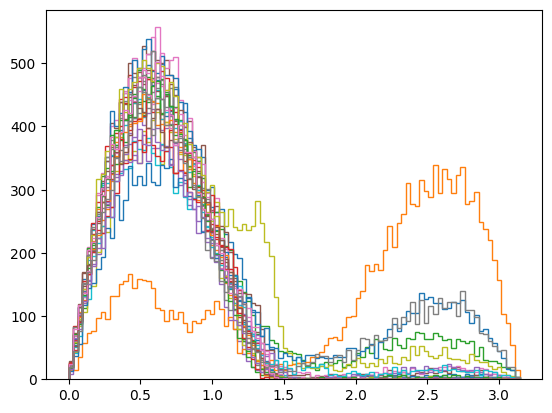

In [88]:
bins = np.linspace(0, np.pi, 100)
counts = np.zeros((100, len(idx_LVA)))

for i in range(len(idx_LVA)):

    cnt, _, _ = plt.hist(iota[i], bins=bins, histtype='step')
    counts[1:,i] = cnt

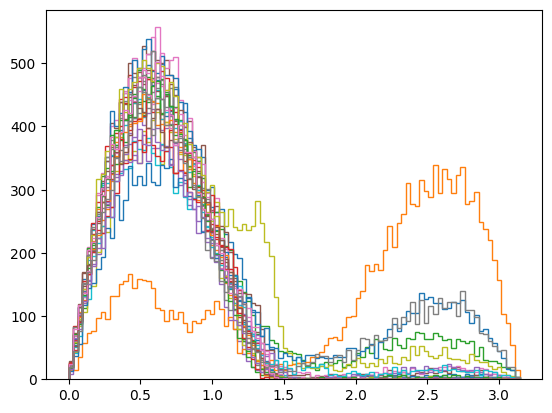

In [89]:
bins = np.linspace(0, np.pi, 100)
counts = np.zeros((100, len(idx_LVA)))
numbs_LVA = np.zeros(100)

for i in range(len(idx_LVA)):

    cnt, _, _ = plt.hist(iota[i], bins=bins, histtype='step')
    counts[1:,i] = cnt
    numbs_LVA[1:] += cnt
    
numbs_LVA = np.ceil(numbs_LVA/len(idx_LVA))

numbs_LV = np.array([  0.,  13.,  37.,  63.,  87., 109., 132., 152., 165., 191., 209.,
       218., 230., 238., 258., 261., 262., 269., 276., 269., 266., 264.,
       257., 250., 243., 235., 229., 215., 200., 192., 181., 164., 151.,
       136., 128., 117., 107.,  96.,  83.,  78.,  69.,  62.,  55.,  51.,
        45.,  44.,  39.,  39.,  34.,  35.,  35.,  33.,  31.,  32.,  35.,
        36.,  38.,  40.,  40.,  48.,  51.,  56.,  59.,  64.,  68.,  74.,
        82.,  88.,  93.,  99., 107., 118., 123., 135., 141., 145., 151.,
       159., 163., 162., 165., 171., 169., 165., 172., 160., 162., 157.,
       149., 140., 129., 117., 108.,  98.,  85.,  68.,  55.,  40.,  24.,
         9.])

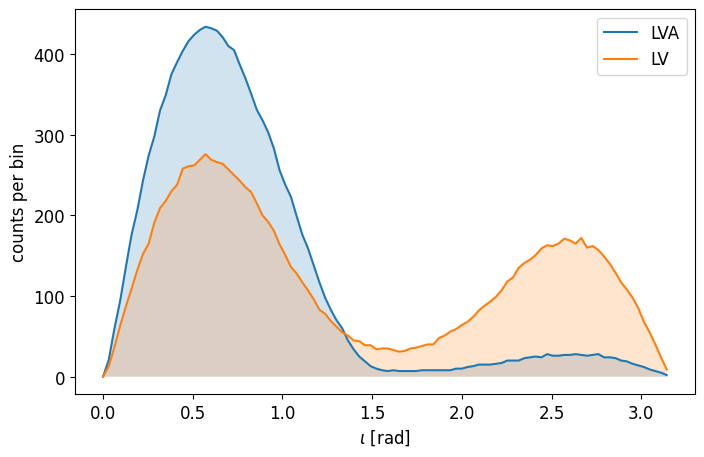

In [90]:
fig, ax = plt.subplots(figsize=(8, 5))

fontsize = 12
ax.plot(bins, numbs_LVA, label='LVA')
ax.fill_between(bins, numbs_LVA, alpha=0.2)
ax.plot(bins, numbs_LV, label='LV')
ax.fill_between(bins, numbs_LV, alpha=0.2)
ax.set_xlabel(r'$\iota$ [rad]', fontsize=fontsize)
ax.set_ylabel(r'counts per bin', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
fig.show()

In [91]:
iota_big_LVA = np.empty([])

for i in range(len(idx_LVA)):
    
    iota_big_LVA = np.append(iota_big_LVA, iota[i])
    
dL_big_LVA = np.empty([])

for i in range(len(idx_LVA)):
    
    dL_big_LVA = np.append(dL_big_LVA, dL[i])
    

In [ ]:
LV_str = []
LVA_str = []

for i in range(len(samps_LV[:,6])):
    
    LV_str.append('LV')
    
for i in range(len(samps_LVA[:,6])):
    
    LVA_str.append('LVA')
    
data1 = {r'$\iota$': samps_LV[:,3], r'$d_L$': samps_LV[:,6], 'Network': LV_str}  
df1 = pd.DataFrame(data1)

data2 = {r'$\iota$': samps_LVA[:,3], r'$d_L$': samps_LVA[:,6], 'Network': LVA_str}  
df2 = pd.DataFrame(data2)
    
df_merged = pd.concat([df1, df2])
 
sns.jointplot(data=df_merged, x=r"$\iota$", y=r"$d_L$", \
              marginal_kws={"lw": lw, 'fill':True}, hue="Network", marker='.', s=5) #,joint_kws={'marker': '.', 'size': 0.1}) #, kind='kde', n_levels=1)

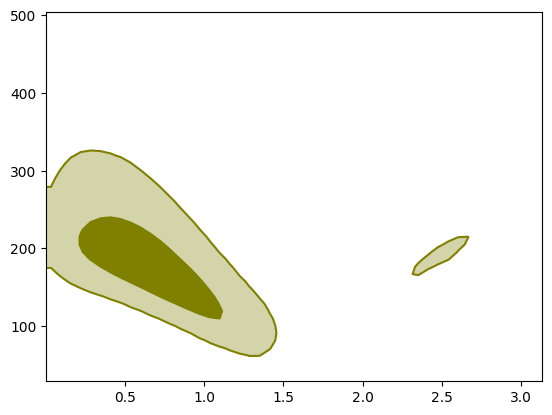

In [112]:
fig = corner.hist2d(iota_big_LVA[1:], dL_big_LVA[1:], bins=50, color='olive', smooth=0.9, \
                                        levels=[0.5, 0.9], fill_contours=True, plot_datapoints=False)


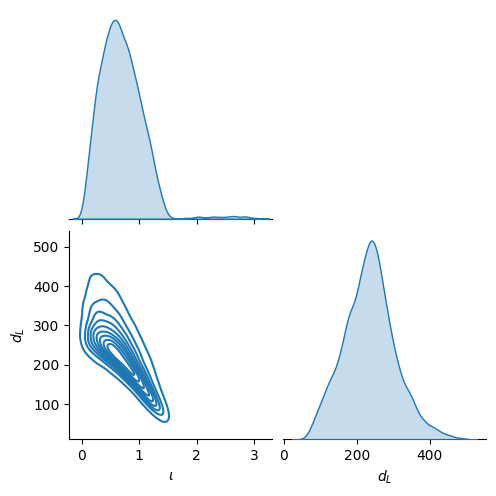

In [109]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.column_stack((iota[0], dL[0])), columns=[r'$\iota$', r'$d_L$'])
sns.pairplot(df, kind='kde', corner=True)

In [101]:
sns.pairplot

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

In [ ]:
import numpy
digitized = numpy.digitize(data, bins)
bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]

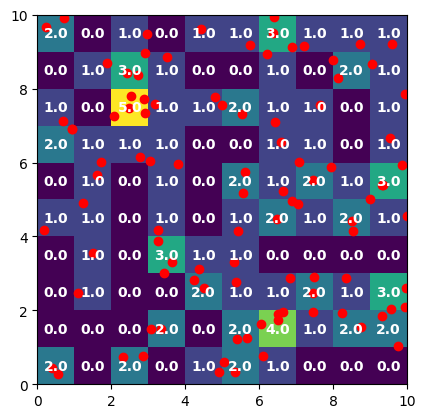

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


ngal=100
mu = 0 #mean
sigma = 0.3 #standard deviation
r = np.random.normal(size = ngal) #generate size amount of random numbers
e1 = (r * sigma)

mu2 = 0
sigma2 = 0.3
r2 = np.random.normal(size = ngal)
e2 = (r2 * sigma)

x = np.random.uniform(low = 0, high = 10, size = ngal)

y = np.random.uniform(low = 0, high = 10, size = ngal)

m = np.asarray([x,y,e1,e2]).transpose()

lower_bound = 0
upper_bound = 10

bins = 10
bins1 = bins + 1

bin_array = np.linspace(lower_bound, upper_bound, bins1)

fig, ax = plt.subplots()
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x,y, bins = bin_array)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        ax.text(xbins[i]+0.5,ybins[j]+0.5, hist[i,j], 
            color="w", ha="center", va="center", fontweight="bold")
plt.plot(x,y,'ro')
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()